# HOUSE PRICE PREDICTIONS


# Importing Data

In [ ]:
# prompt: Import pandas,numpy,matplotlib,metrics from sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

# Importing Data

In [ ]:
# prompt: Import a simple housing dataset from sklearn

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['target'] = housing.target
df.head()

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# Checking for missing data

In [ ]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Understanding The Corellation between variouus features in the dataset

In [ ]:
correlation = df.corr()
correlation

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


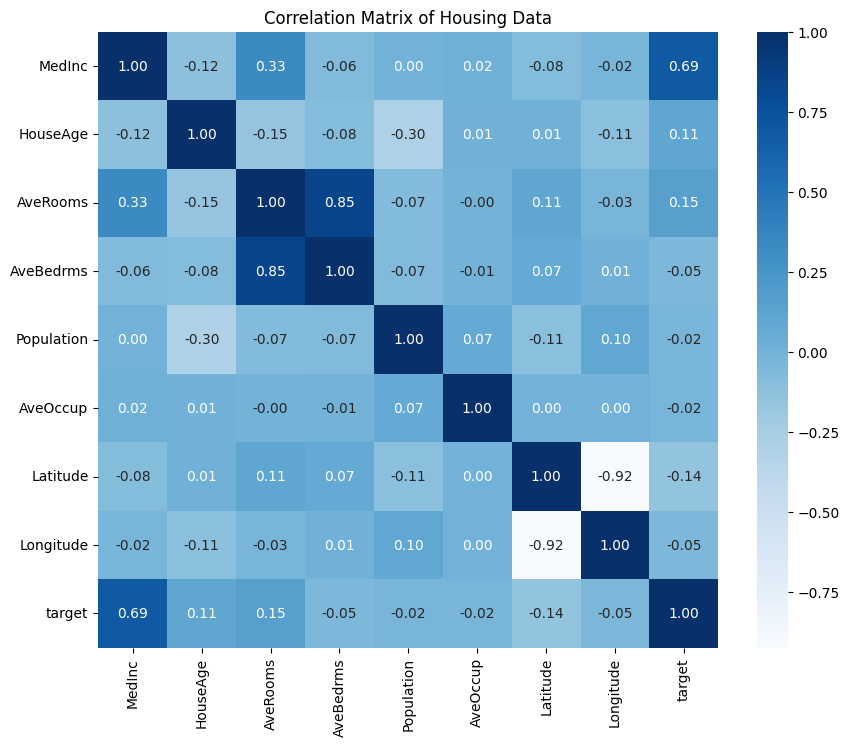

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix of Housing Data')
plt.show()

# Spliting Data

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
X = df.drop('target', axis=1)
y = df.iloc[:,-1]

In [ ]:
print(X)
print(y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

# Spliting Data Into Train Set and Test Set

In [ ]:

from sklearn.model_selection import train_test_split

# # Spliting Data Into Train Set and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
y_test.shape


(16512, 8)
(4128, 8)
(16512,)


(4128,)

# Feature Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling using Standardization
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train.values.reshape(-1,1)) #Reshape y_train because scaler needs 2 dimensions
y_test = scaler_y.transform(y_test.values.reshape(-1,1))


# Model Training

In [ ]:
import xgboost as xgb

# Initialize and train the XGBoost regressor
xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)
xgbr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgbr.predict(X_test)

# Inverse transform the scaled predictions and actual values to get them back to the original scale
y_pred_original_scale = scaler_y.inverse_transform(y_pred.reshape(-1,1))
y_test_original_scale = scaler_y.inverse_transform(y_test)


In [ ]:
from sklearn.metrics import r2_score

# Calculate the percentage accuracy (R-squared)
r2 = r2_score(y_test_original_scale, y_pred_original_scale)
percentage_accuracy = r2 * 100

# Calculate absolute differences between predicted and actual values
absolute_differences = np.abs(y_test_original_scale - y_pred_original_scale)

# Calculate the mean absolute difference
mean_absolute_difference = np.mean(absolute_differences)

# Print the results
print(f"R-squared (Percentage Accuracy): {percentage_accuracy:.2f}%")
print(f"Mean Absolute Difference: {mean_absolute_difference:.2f}")


R-squared (Percentage Accuracy): 83.01%
Mean Absolute Difference: 0.31


In [ ]:
# Concatenate y_test_original_scale and y_pred_original_scale
y_test_original_scale = y_test_original_scale.flatten()
y_pred_original_scale = y_pred_original_scale.flatten()
result_df = pd.DataFrame({'Actual': y_test_original_scale, 'Predicted': y_pred_original_scale})

# Print the result
result_df


,Actual,Predicted
0,0.47700,0.594452
1,0.45800,0.784119
2,5.00001,5.198114
3,2.18600,2.439808
4,2.78000,2.427433
...,...,...
4123,2.63300,2.402855
4124,2.66800,1.927941
4125,5.00001,5.058280
4126,0.72300,0.761061
